## CNN Model To Classify Zalando's Article Images

In [24]:
#Reading data
import os
import pandas as pd

train = pd.read_csv("C:/Users/Mounika/Documents/monica work/INSOFE/Assignment/Assignment/zalando_train.csv/fashion-mnist_train.csv").values
test = pd.read_csv("C:/Users/Mounika/Documents/monica work/INSOFE/Assignment/Assignment/zalando_test.csv/fashion-mnist_test.csv").values

In [27]:
train.shape[0]

60000

As the data given to us in CSV format which is an array, we need to convert these into image format(An image is a 3-D matrix of pixels). So we now reshape the array into 3D matrix and separate the target variable(labels of images) from data.

Note: Keras requires an extra dimension in the end which correspond to channels. MNIST images are gray scaled so it use only one channel. For RGB images, there is 3 channels, we would have reshaped 784px vectors to 28x28x3 3D matrices.

In [51]:
# Reshape the  train and test data
img_rows,img_cols=28,28
img_channels = 1

train_data = train[:, 1:].reshape(train.shape[0],img_rows, img_cols,img_channels).astype( 'float32' )
train_labels = train[:,0]

test_data = test[:,1:].reshape(test.shape[0],28, 28,1).astype( 'float32' )
test_labels = test[:,0]

### Label Encoding

In [52]:
# Encode labels to one hot vectors (ex : 5 -> [0,0,0,0,0,1,0,0,0,0])

import numpy as np 

nb_classes = len(np.unique(train_labels)) #Finding the number of classes of target variable

#Converting class vectors to binary class matrices


from keras.utils import to_categorical

train_labels = to_categorical(train_labels,nb_classes)
test_labels  = to_categorical(test_labels,nb_classes)

In [53]:
#Normalizing the data

train_data /=255
test_data /= 255

In [54]:
#Importing libraries to build convolutional neural network.

from keras import Sequential
from keras.layers import Convolution2D,MaxPooling2D
from keras.layers import Dense,Dropout,Flatten

In [55]:
train_data.shape

(60000, 28, 28, 1)

In [56]:
#Building the CNN architecture

img_rows,img_cols=28,28
img_channels=1
model = Sequential()
model.add(Convolution2D(filters=32,kernel_size = (3,3),strides = 1,padding = 'same',activation = 'relu',
                       input_shape=(img_rows,img_cols,img_channels)))
model.add(Convolution2D(filters = 32,kernel_size=(3,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Convolution2D(filters=64,kernel_size = (3,3),strides = 1,padding = 'same',activation = 'relu'))
model.add(Convolution2D(filters = 64,kernel_size=(3,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes,activation='softmax'))


In [57]:
#Configuring the model

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [61]:
#Fitting the model

batch_size = 32
nb_epoch = 25
model_train = model.fit(train_data,train_labels,
             batch_size = batch_size,epochs = nb_epoch,
             validation_split=0.3,
             shuffle = True)

Train on 42000 samples, validate on 18000 samples
Epoch 1/25
42000/42000 [==============================] - 311s 7ms/step - loss: 0.2170 - acc: 0.9203 - val_loss: 0.1822 - val_acc: 0.9345
Epoch 2/25
42000/42000 [==============================] - 308s 7ms/step - loss: 0.2066 - acc: 0.9236 - val_loss: 0.1819 - val_acc: 0.9324
Epoch 3/25
42000/42000 [==============================] - 295s 7ms/step - loss: 0.1967 - acc: 0.9264 - val_loss: 0.1806 - val_acc: 0.9337
Epoch 4/25
42000/42000 [==============================] - 315s 7ms/step - loss: 0.1923 - acc: 0.9287 - val_loss: 0.1760 - val_acc: 0.9368
Epoch 5/25
42000/42000 [==============================] - 299s 7ms/step - loss: 0.1819 - acc: 0.9309 - val_loss: 0.1837 - val_acc: 0.9336
Epoch 6/25
42000/42000 [==============================] - 289s 7ms/step - loss: 0.1796 - acc: 0.9333 - val_loss: 0.1773 - val_acc: 0.9358
Epoch 7/25
42000/42000 [==============================] - 293s 7ms/step - loss: 0.1743 - acc: 0.9344 - val_loss: 0.1861 - 

In [62]:
#Saving the model
model.save('mnist_model.h5py')

### Model Evaluation

In [63]:
#Model evaluation on the test set
test_eval = model.evaluate(test_data, test_labels, verbose=1)

10000/10000 [==============================] - 15s 2ms/step


In [64]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.21293689974
Test accuracy: 0.9299


In [66]:
from keras.models import load_model
model_final = load_model('mnist_model.h5py')

In [67]:
#Predicting classes for test data
predictions= model_final.predict(test_data)
print(predictions)

[[  9.98923838e-01   1.24032983e-14   6.35683364e-07 ...,   1.33522039e-14
    2.93928021e-10   6.97976697e-14]
 [  6.06678747e-31   1.00000000e+00   1.53515845e-32 ...,   0.00000000e+00
    1.01922883e-31   0.00000000e+00]
 [  3.35210789e-05   8.12577409e-14   9.91536021e-01 ...,   4.13948450e-19
    8.14865482e-13   3.69083589e-17]
 ..., 
 [  4.70473163e-30   0.00000000e+00   6.42641081e-38 ...,   4.55746874e-34
    1.00000000e+00   3.19543694e-38]
 [  4.49747149e-11   3.63873608e-17   1.16644891e-17 ...,   1.81406307e-16
    1.00000000e+00   1.55932932e-15]
 [  1.02248332e-05   9.99402285e-01   9.39686743e-06 ...,   4.80918816e-09
    1.89453895e-05   4.13299256e-11]]


In [80]:
predicted_classes = predictions.round()

In [101]:
# Convert one hot vectors to prediction classes
Y_pred_classes = np.argmax(predictions,axis = 1)
Y_true = np.argmax(test_labels,axis = 1)

C:\Users\Mounika\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function plot_confusion_matrix is deprecated; This will be removed in v0.4.0. Please use scikitplot.metrics.plot_confusion_matrix instead.
  warnings.warn(msg, category=DeprecationWarning)


([<matplotlib.axis.YTick at 0x23619802240>,
 <a list of 10 Text yticklabel objects>)

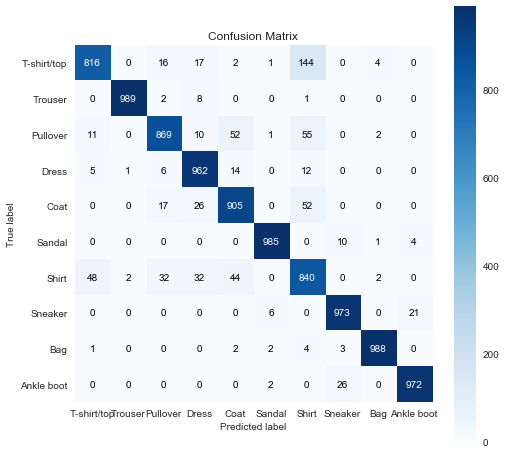

In [146]:
#Confusion matrix

import scikitplot.plotters as skplt
import matplotlib.pyplot as plt
%matplotlib inline
skplt.plot_confusion_matrix(Y_true, Y_pred_classes,figsize=(8,8))
plt.xticks([0,1,2,3,4,5,6,7,8,9],['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot'])
plt.yticks([0,1,2,3,4,5,6,7,8,9],['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot'])

From the above confusion matrix, we observe that maximum errors were made while predicting shirts which were confused to be T-shirt/top which is quite common even to the human eye.

In [152]:
#Classification Report

from sklearn.metrics import classification_report
print (classification_report(Y_true, Y_pred_classes))

             precision    recall  f1-score   support

          0       0.93      0.82      0.87      1000
          1       1.00      0.99      0.99      1000
          2       0.92      0.87      0.89      1000
          3       0.91      0.96      0.94      1000
          4       0.89      0.91      0.90      1000
          5       0.99      0.98      0.99      1000
          6       0.76      0.84      0.80      1000
          7       0.96      0.97      0.97      1000
          8       0.99      0.99      0.99      1000
          9       0.97      0.97      0.97      1000

avg / total       0.93      0.93      0.93     10000



The highest scores were observed while predicting trousers and sneakers (may be because there were no other similar things) and the lowest were observed while predicting shirts because they were mostly confused with tops or pullovers.